In [1]:
try:
  import numpy as np # using it for the detecting dimintions!
  import cv2 # using it to detect face, eyes etc.!
  import matplotlib.pyplot as plt # using it to display the images!
  %matplotlib inline

except Exception as e:
  print('Packages are Missing! \n {}'.format(e))

Shape of Color Image: (555, 700, 3) 



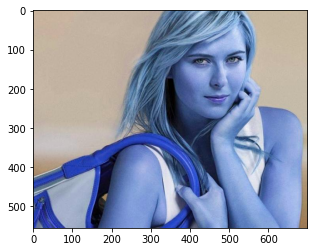

In [2]:
img = cv2.imread('./data/test1.jpg') # reading img
print(f'Shape of Color Image: {img.shape} \n') # printing the shape of the original img

plt.imshow(img) # displaying color img!

Shape of Gray Image: (555, 700) 



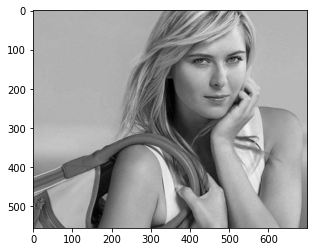

In [3]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # converting img to gray img!
print(f'Shape of Gray Image: {gray.shape} \n') # printing shape of the gray image!

plt.imshow(gray, cmap='gray') # displaying gray img!

In [4]:
face_clf = cv2.CascadeClassifier('./opencv-clf/haarcascade_frontalface_default.xml') # face classifier!
eye_clf = cv2.CascadeClassifier('./opencv-clf/haarcascade_eye.xml') # eye classifier!

faces = face_clf.detectMultiScale(gray, 1.3, 5) # detecting face
print(f'Dimension of The Face(x,y,w,h): {faces}') # printing face dimentsion!

Dimension of The Face(x,y,w,h): [[352  38 233 233]]


In [5]:
# storing first face in face[0] with its (x,y,w,h)
(x,y,w,h) = faces[0] # face1
print(f'Print face1: {x,y,w,h}')

Print face1: (352, 38, 233, 233)


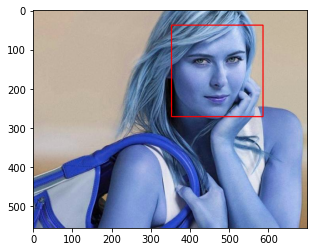

In [6]:
face_img = cv2.rectangle(img, (x,y), (x+w, y+h), (255,0,0),2) # making a rect on face starts with (x,y) and (x+w, y+h)
plt.imshow(face_img) # displaying the img after rect it!

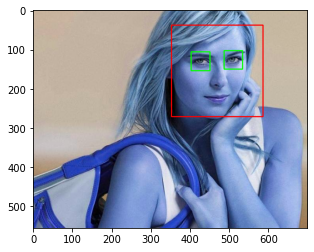

In [9]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
  # making a rect on face starts with (x,y) and (x+w, y+h)
  face_img = face_img = cv2.rectangle(img, (x,y), (x+w, y+h), (255,0,0),2) 
  roi_gray = gray[y:y+h, x:x+w]
  roi_color = face_img[y:y+h, x:x+w]
  # making a rect on eye starts with (ex,ey) and (ex+ew, ey+eh)
  eyes = eye_clf.detectMultiScale(roi_gray)
  for (ex,ey,ew,eh) in eyes:
    cv2.rectangle(roi_color, (ex,ey), (ex+ew, ey+eh), (0,255,0), 2)

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

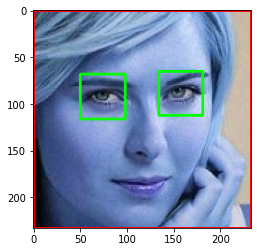

In [11]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')